IMPROT LIBRARIES

Food delivery services have become an essential part of our daily lives. Companies like UberEats, DoorDash, and others provide a platform for customers to order food from their favorite restaurants and have it delivered quickly. 

BUISNESS PROBLEM :
 Now a late delivery can lead to unhappy customers, while too early delivery might satisfy the customer because in this ultra modern era people dont love to wait. Setting the right delivery time is crucial to maintain a balance between customer satisfaction and operational efficiency.predicting the exact delivery time , customer should concern about when their delivery should arrived.

This is where a machine learning model comes into play, helping you predict the best delivery time based on various factors like traffic conditions, weather, and distance.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

READING THE DATA

In [2]:
df=pd.read_csv("./data/train.csv")
df


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [3]:
df.shape

(45593, 20)

The dataset consist of 45593 delivery records with 20 columns and 20 rows

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

KEY OBSERVATION:

	1.The Time_taken(min) column should be converted to a numerical value instead of an object.
	

In [3]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', ' ').astype("int32")


In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


BASIC DATA EXPLORATION

MISSING VALUES

ANALYZING VARIABLES // DATA PREPROCESSING

 we will eliminate the ID and Delivery_person_ID columns.do not contribute valuable information for our analysis or model building purposes. Removing them will help improve the overall quality and focus of our dataset.

In [4]:
df.drop(['ID',
			'Delivery_person_ID',
			'Delivery_person_Age'],axis=1, inplace=True)

In [11]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
multiple_deliveries,45593,5,1,28159
Festival,45593,3,No,44469


The Time_Ordered column contains NaN values that require handling.

In [5]:
df.replace('NaN', float(np.nan),regex=True, inplace=True)

In [35]:
df.isnull().sum()

Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

Handling missing values is important to keep our data accurate and unbiased. We'll start by converting "NaN" strings to np.nan, then count and print the number of missing values for each feature.

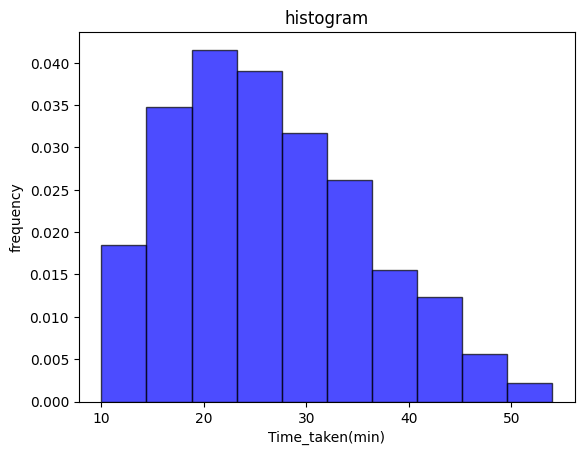

In [24]:
import matplotlib.pyplot as plt

plt.hist(df['Time_taken(min)'], bins=10,color='blue',edgecolor='black',density=True, alpha=0.7)
plt.xlabel('Time_taken(min)')
plt.ylabel('frequency')
plt.title('histogram')
plt.show()



The peak of the histogram occurs around 25 minutes, suggesting that the most common delivery time is approximately 25 minutes.



By analyzing this histogram, we can infer that while most deliveries are completed within a certain time frame (15-35 minutes), there are some instances where deliveries take significantly longer. This can be useful for identifying areas for improvement in the delivery process to ensure more consistent delivery times.

we will proceed to update the data types of features to their most appropriate formats.

In [6]:

df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
df["multiple_deliveries"]=df["multiple_deliveries"].astype("float64")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Ratings      43685 non-null  float64
 1   Restaurant_latitude          45593 non-null  float64
 2   Restaurant_longitude         45593 non-null  float64
 3   Delivery_location_latitude   45593 non-null  float64
 4   Delivery_location_longitude  45593 non-null  float64
 5   Order_Date                   45593 non-null  object 
 6   Time_Orderd                  43862 non-null  object 
 7   Time_Order_picked            45593 non-null  object 
 8   Weatherconditions            44977 non-null  object 
 9   Road_traffic_density         44992 non-null  object 
 10  Vehicle_condition            45593 non-null  int64  
 11  Type_of_order                45593 non-null  object 
 12  Type_of_vehicle              45593 non-null  object 
 13  multiple_deliver

As for Delivery_person_Ratings, which exhibits a left-skewed distribution, the missing values will be filled with the median.

For the remaining categorical columns, the missing values will be filled with the mode, representing the most frequently occurring value in each respective column.

In [7]:
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)

df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)


FETAURE ENGNEERING

 we have access to features like order date, order time, and picked time, which provide ample opportunities for creating multiple new features that can help us in capturing and utilizing various aspects of time-related information.

In [8]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['year']=df['Order_Date'].dt.year
df['month']=df['Order_Date'].dt.month
df['Day']=df['Order_Date'].dt.day
df.head()

C:\Users\dassu\AppData\Local\Temp\ipykernel_5664\4088039711.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,Day
0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2022,3,19
1,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,2022,3,25
2,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,2022,3,19
3,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022,4,5
4,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,2022,3,26


In [39]:
df.drop('Order_Date',axis=1,inplace=True)

In [16]:
df.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,Day
0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2022,3,19
1,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,2022,3,25
2,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,2022,3,19
3,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022,4,5
4,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,2022,3,26


DEAL WITH TIME ORDERD COLUMN

In [40]:
# df.replace("NaN", np.nan, inplace=True)

df.dropna(subset=["Time_Orderd"],inplace=True)

In [41]:

df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'],format='%H:%M:%S')

df['Hour'] = df['Time_Orderd'].dt.hour.astype("str")
df['Minute'] = df['Time_Orderd'].dt.minute.astype("str")


df['Hour'] = df['Hour'].astype("float64")
df['Minute']=df['Minute'].astype("float64")

df.drop("Time_Orderd",axis=1,inplace=True)





df.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),year,month,Day,Hour,Minute
0,4.9,22.745049,75.892471,22.765049,75.912471,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2022,3,19,11.0,30.0
1,4.5,12.913041,77.683237,13.043041,77.813237,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,2022,3,25,19.0,45.0
2,4.4,12.914264,77.678400,12.924264,77.688400,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,2022,3,19,8.0,30.0
3,4.7,11.003669,76.976494,11.053669,77.026494,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022,4,5,18.0,0.0
4,4.6,12.972793,80.249982,13.012793,80.289982,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,2022,3,26,13.0,30.0


DEAL WITH TIME ORDER PICKED

In [25]:
df['Hour']

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: Hour, Length: 45593, dtype: float64

In [42]:
df['Time_Order_picked']=pd.to_datetime(df["Time_Order_picked"])


df["Time_Order_picked_Hour"]=df["Time_Order_picked"].dt.hour.astype('float64')
df["Time_Order_picked_Minute"]=df["Time_Order_picked"].dt.minute.astype('float64')

df.drop("Time_Order_picked", axis=1, inplace=True)



df.head()



C:\Users\dassu\AppData\Local\Temp\ipykernel_17888\3328152330.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time_Order_picked']=pd.to_datetime(df["Time_Order_picked"])


,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Festival,City,Time_taken(min),year,month,Day,Hour,Minute,Time_Order_picked_Hour,Time_Order_picked_Minute
0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,motorcycle,...,No,Urban,24,2022,3,19,11.0,30.0,11.0,45.0
1,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,scooter,...,No,Metropolitian,33,2022,3,25,19.0,45.0,19.0,50.0
2,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,motorcycle,...,No,Urban,26,2022,3,19,8.0,30.0,8.0,45.0
3,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,motorcycle,...,No,Metropolitian,21,2022,4,5,18.0,0.0,18.0,10.0
4,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,scooter,...,No,Metropolitian,30,2022,3,26,13.0,30.0,13.0,45.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Ratings      43862 non-null  float64
 1   Restaurant_latitude          43862 non-null  float64
 2   Restaurant_longitude         43862 non-null  float64
 3   Delivery_location_latitude   43862 non-null  float64
 4   Delivery_location_longitude  43862 non-null  float64
 5   Weatherconditions            43862 non-null  object 
 6   Road_traffic_density         43862 non-null  object 
 7   Vehicle_condition            43862 non-null  int64  
 8   Type_of_order                43862 non-null  object 
 9   Type_of_vehicle              43862 non-null  object 
 10  multiple_deliveries          43862 non-null  float64
 11  Festival                     43862 non-null  object 
 12  City                         43862 non-null  object 
 13  Time_taken(min)      

CALCULATE DISTANCE

In [44]:
import math
# Earth's radius
R=6371


def distance(lat1,lon1,lat2,lon2):
	lat1,lon1,lat2,lon2=map(math.radians,[lat1,lon1,lat2,lon2])


	# Haversine formula
	dlat = lat2 - lat1
	dlon = lon2 - lon1
	a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
	c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
	return R * c


df['distance']=df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'],row['Delivery_location_latitude'], row['Delivery_location_longitude']),axis=1)

In [45]:
df.isnull().sum()

Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
year                           0
month                          0
Day                            0
Hour                           0
Minute                         0
Time_Order_picked_Hour         0
Time_Order_picked_Minute       0
distance                       0
dtype: int64

In [24]:
df.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,City,Time_taken(min),year,month,Day,Hour,Minute,Time_Order_picked_Hour,Time_Order_picked_Minute,distance
0,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,motorcycle,...,Urban,24,2022,3,19,11.0,30.0,11.0,45.0,3.025149
1,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,scooter,...,Metropolitian,33,2022,3,25,19.0,45.0,19.0,50.0,20.183530
2,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,motorcycle,...,Urban,26,2022,3,19,8.0,30.0,8.0,45.0,1.552758
3,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,motorcycle,...,Metropolitian,21,2022,4,5,18.0,0.0,18.0,10.0,7.790401
4,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,scooter,...,Metropolitian,30,2022,3,26,13.0,30.0,13.0,45.0,6.210138


In [25]:
print(df.columns)

Index(['Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'year', 'month', 'Day', 'Hour', 'Minute',
       'Time_Order_picked_Hour', 'Time_Order_picked_Minute', 'distance'],
      dtype='object')


In [46]:
categorical_col=df.select_dtypes(include=["object"]).columns
print(categorical_col)

Index(['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


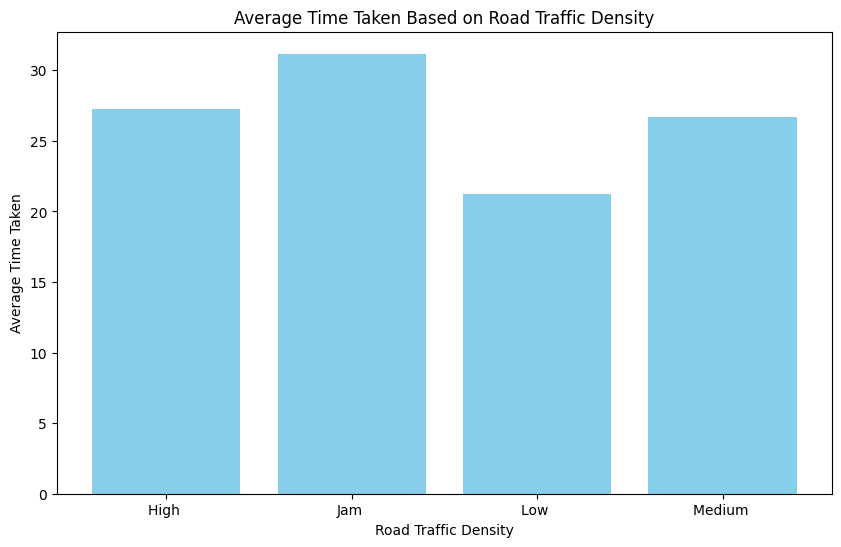

In [23]:
avg_time_taken = df.groupby('Road_traffic_density')['Time_taken(min)'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_time_taken['Road_traffic_density'], avg_time_taken['Time_taken(min)'], color='skyblue')
plt.xlabel('Road Traffic Density')
plt.ylabel('Average Time Taken')
plt.title('Average Time Taken Based on Road Traffic Density')
plt.show()

In [47]:
categorical_data=df[categorical_col]
categorical_data

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,conditions Sunny,High,Snack,motorcycle,No,Urban
1,conditions Stormy,Jam,Snack,scooter,No,Metropolitian
2,conditions Sandstorms,Low,Drinks,motorcycle,No,Urban
3,conditions Sunny,Medium,Buffet,motorcycle,No,Metropolitian
4,conditions Cloudy,High,Snack,scooter,No,Metropolitian
...,...,...,...,...,...,...
45588,conditions Windy,High,Meal,motorcycle,No,Metropolitian
45589,conditions Windy,Jam,Buffet,motorcycle,No,Metropolitian
45590,conditions Cloudy,Low,Drinks,scooter,No,Metropolitian
45591,conditions Cloudy,High,Snack,motorcycle,No,Metropolitian


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
for col in categorical_col:
	df[col]=label_encoder.fit_transform(df[col])


df.head()


,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,City,Time_taken(min),year,month,Day,Hour,Minute,Time_Order_picked_Hour,Time_Order_picked_Minute,distance
0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,1,...,2,24,2022,3,19,11.0,30.0,11.0,45.0,3.025149
1,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,2,...,0,33,2022,3,25,19.0,45.0,19.0,50.0,20.183530
2,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,1,...,2,26,2022,3,19,8.0,30.0,8.0,45.0,1.552758
3,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,1,...,0,21,2022,4,5,18.0,0.0,18.0,10.0,7.790401
4,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,2,...,0,30,2022,3,26,13.0,30.0,13.0,45.0,6.210138


In [21]:
df['Time_taken(min)']

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 43862, dtype: int32

In [22]:
df.info()
# Check for NaN values in each column
columns_with_nan = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Ratings      43862 non-null  float64
 1   Restaurant_latitude          43862 non-null  float64
 2   Restaurant_longitude         43862 non-null  float64
 3   Delivery_location_latitude   43862 non-null  float64
 4   Delivery_location_longitude  43862 non-null  float64
 5   Weatherconditions            43862 non-null  int32  
 6   Road_traffic_density         43862 non-null  int32  
 7   Vehicle_condition            43862 non-null  int64  
 8   Type_of_order                43862 non-null  int32  
 9   Type_of_vehicle              43862 non-null  int32  
 10  multiple_deliveries          43862 non-null  float64
 11  Festival                     43862 non-null  int32  
 12  City                         43862 non-null  int32  
 13  Time_taken(min)      

In [49]:
from sklearn.model_selection import train_test_split
X=df.drop("Time_taken(min)",axis=1)
y=df["Time_taken(min)"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train.shape


(35089,)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble  import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [32]:

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"mean absolute error :{mae}")
print(f"mse absolute error :{mse}")
print(f"rmse absolute error :{rmse}")
print(f"r2_score absolute error :{r2}")


In [58]:

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"mean absolute error :{mae}")
print(f"mse absolute error :{mse}")
print(f"rmse absolute error :{rmse}")
print(f"r2_score absolute error :{r2}")

mean absolute error :3.8904331471560476
mse absolute error :24.58966443633877
rmse absolute error :4.958796672211794
r2_score absolute error :0.719705602560013


In [56]:



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"mean absolute error :{mae}")
print(f"mse absolute error :{mse}")
print(f"rmse absolute error :{rmse}")
print(f"r2_score absolute error :{r2}")

mean absolute error :5.585694414103572
mse absolute error :48.162469405207815
rmse absolute error :6.939918544565765
r2_score absolute error :0.4510022543778749


In [55]:

# Support Vector Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_y_pred)

print("Support Vector Regressor:")
print(f"Mean Absolute Error: {svm_mae}")
print(f"Mean Squared Error: {svm_mse}")
print(f"Root Mean Squared Error: {svm_rmse}")
print(f"R^2 Score: {svm_r2}")


Support Vector Regressor:
Mean Absolute Error: 7.53890726787897
Mean Squared Error: 87.03267085234712
Root Mean Squared Error: 9.329130230216915
R^2 Score: 0.007925866686468774


In [57]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
dt_y_pred = decision_tree_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)

print("Decision Tree Regressor:")
print(f"Mean Absolute Error: {dt_mae}")
print(f"Mean Squared Error: {dt_mse}")
print(f"Root Mean Squared Error: {dt_rmse}")
print(f"R^2 Score: {dt_r2}")
print("\n")

Decision Tree Regressor:
Mean Absolute Error: 5.133021771343896
Mean Squared Error: 46.043314715604694
Root Mean Squared Error: 6.7855224349791
R^2 Score: 0.4751582239862535


